In [ ]:
from google.colab import files
#Upload Your Json File
files.upload()

Saving covid_germany_tugas.json to covid_germany_tugas.json
Saving covid_india_tugas.json to covid_india_tugas.json
Saving covid_indonesia_tugas.json to covid_indonesia_tugas.json


{'covid_germany_tugas.json': b'[{"Country":"Germany","CountryCode":"DE","Province":"","City":"","CityCode":"","Lat":"51.17","Lon":"10.45","Cases":195893,"Status":"confirmed","Date":"2020-07-01T00:00:00Z"},{"Country":"Germany","CountryCode":"DE","Province":"","City":"","CityCode":"","Lat":"51.17","Lon":"10.45","Cases":196370,"Status":"confirmed","Date":"2020-07-02T00:00:00Z"},{"Country":"Germany","CountryCode":"DE","Province":"","City":"","CityCode":"","Lat":"51.17","Lon":"10.45","Cases":196780,"Status":"confirmed","Date":"2020-07-03T00:00:00Z"},{"Country":"Germany","CountryCode":"DE","Province":"","City":"","CityCode":"","Lat":"51.17","Lon":"10.45","Cases":197198,"Status":"confirmed","Date":"2020-07-04T00:00:00Z"},{"Country":"Germany","CountryCode":"DE","Province":"","City":"","CityCode":"","Lat":"51.17","Lon":"10.45","Cases":197523,"Status":"confirmed","Date":"2020-07-05T00:00:00Z"},{"Country":"Germany","CountryCode":"DE","Province":"","City":"","CityCode":"","Lat":"51.17","Lon":"10.4

In [85]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

def normalizer(array):
  norm2 = preprocessing.normalize(array[:,np.newaxis], axis=0).ravel()
  return norm2

def JsonToDataframe(json_file, normalize=False):
  indo = pd.read_json(json_file[0])
  germany = pd.read_json(json_file[1])
  india = pd.read_json(json_file[2])

  indo['Date'] = indo['Date'].dt.strftime('%Y-%m-%d')
  indo['Date'] = pd.to_datetime(indo['Date'])

  if normalize:
    norm_indo = normalizer(indo['Cases'].values)
    norm_germ = normalizer(germany['Cases'].values)
    norm_india = normalizer(india['Cases'].values)

    final_df_norm = pd.DataFrame()
    final_df_norm['date'] = indo['Date']
    final_df_norm['norm_idn'] = norm_indo
    final_df_norm['norm_deu'] = norm_germ
    final_df_norm['norm_ind'] = norm_india

    return final_df_norm

  final_df = pd.DataFrame()
  final_df['date'] = indo['Date']
  final_df['case_idn'] = indo['Cases']
  final_df['case_deu'] = germany['Cases']
  final_df['case_ind'] = india['Cases']

  return final_df

In [86]:
country = ['covid_indonesia_tugas.json','covid_germany_tugas.json','covid_india_tugas.json']
data = JsonToDataframe(country)
norm_data = JsonToDataframe(country, normalize=True)

In [89]:
norm_data.head()

,date,norm_idn,norm_deu,norm_ind
0,2020-07-01,0.015830,0.034843,0.008385
1,2020-07-02,0.016275,0.034928,0.008675
2,2020-07-03,0.016632,0.035001,0.008991
3,2020-07-04,0.017029,0.035075,0.009336
4,2020-07-05,0.017469,0.035133,0.009672


In [94]:
data.min()

date        2020-07-01 00:00:00
case_idn                  57770
case_deu                 195893
case_ind                 604641
dtype: object

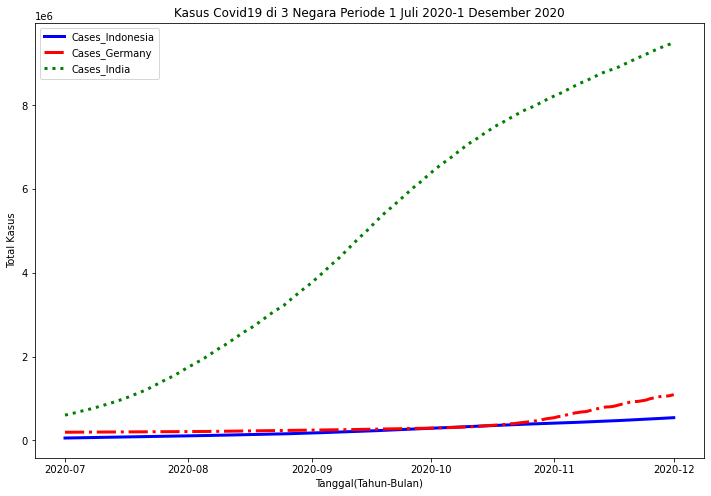

In [84]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,8))
plt.plot(data['date'], data['case_idn'], color='b', linewidth=3, label='Cases_Indonesia')
plt.plot(data['date'], data['case_deu'], color='r', linewidth=3, linestyle='-.', label='Cases_Germany')
plt.plot(data['date'], data['case_ind'], color='g', linewidth=3, linestyle=':', label='Cases_India')
plt.title('Kasus Covid19 di 3 Negara Periode 1 Juli 2020-1 Desember 2020')
ax.set_xlabel("Tanggal(Tahun-Bulan)")
ax.set_ylabel("Total Kasus")
plt.legend()

In [96]:
norm_data.columns

Index(['date', 'norm_idn', 'norm_deu', 'norm_ind'], dtype='object')

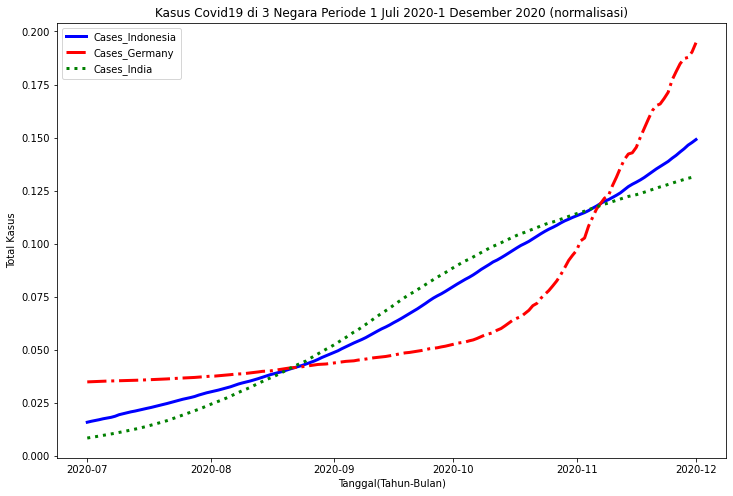

In [98]:
fig,ax = plt.subplots(figsize=(12,8))
plt.plot(norm_data['date'], norm_data['norm_idn'], color='b', linewidth=3, label='Cases_Indonesia')
plt.plot(norm_data['date'], norm_data['norm_deu'], color='r', linewidth=3, linestyle='-.', label='Cases_Germany')
plt.plot(norm_data['date'], norm_data['norm_ind'], color='g', linewidth=3, linestyle=':', label='Cases_India')
plt.title('Kasus Covid19 di 3 Negara Periode 1 Juli 2020-1 Desember 2020 (normalisasi)')
ax.set_xlabel("Tanggal(Tahun-Bulan)")
ax.set_ylabel("Total Kasus")
plt.legend()